# Huggett in Continuous Time
<br>
<div style="text-align: center;">
July 2021 Takeki Sunakawa
<br>
<div style="text-align: center;">    
Hitotsubashi University

# Introduction

- I will present a way to solve Huggett economy in continuous time.


- This note is based on Soyoung Lee's (Bank of Canada) lecture note and Ben Moll's (LSE) MATLAB code. Achdou et al. (2020) is the most important reference.

## Huggett (1993): Saving problem

$$
  v(a_{0},z_{0},0) \equiv \max_{c(s)} \mathbb{E} \int_{0}^{\infty} e^{-\rho s}u(c(s)) ds
$$
subject to

$$
  \dot{a}(s) = r(s)a(s) + z(s) - c(s), \quad a_{0} \text{ is given,} \\
  a \geq \underline{a}
$$

where
- $a$: asset
- $c$: consumption
- $u(c)$: utility
- $r$: interest rate
- $z$: wages, which follow <b>a Poisson process</b> with intensity $\lambda$ (It can be extended to more general stochastic process, but the knowledge of stochastic calculus is required)

## Poisson process

- Continuous-time version of Bernoulli process (a sequence of binary random variables)


- A stochastic variable $x(t)$ takes the value of 0 (no arrival) or 1 (arrival) at each $t$. 


- The probability of $k$ arrivals between $t$ and $t+\tau$ is

$$
  p(k,\tau) = \frac{(\lambda \tau)^{k} e^{-\lambda \tau}}{k!}
$$

- For a very small time interval between $t$ and $t+dt$, the probablity of $k$ arrivals is

$$
  p(k,dt) = \begin{cases}
  1-\lambda dt & \text{ if } k=0 \\
  \lambda dt & \text{ if } k=1 \\
  0 & \text{ if } k>1
  \end{cases}
$$

## Deriving HJB

- Rearrange

$$
  0 = \max_{c(s)} \mathbb{E} \big\{ \int_{t}^{t+dt} e^{-\rho s}u(c(s)) ds + v(a(t+dt),z(t+dt),t+dt) - v(a(t),z(t),t) \big\}
$$

- Divide by $dt$

\begin{align*}
  & 0 = \max_{c(s)} \mathbb{E} \big\{ \frac{1}{dt}\int_{t}^{t+dt} e^{-\rho s}u(c(s)) ds + \frac{1}{dt}\big(v(a(t+dt),z(t+dt),t+dt) - v(a(t),z(t),t)\big) \big\} \\
  \Leftrightarrow & 0 = \max_{c(t)} e^{-\rho t}u(c(t)) + \frac{1}{dt}\big(\mathbb{E}v(a(t+dt),z(t+dt),t+dt) - v(a(t),z(t),t)\big) \\
\end{align*}

- Using $v(a,z) \equiv v(a,z,0)$ and $v(a,z,t) = e^{-\rho t}v(a,z)$ <!--, and $v_{t}(a,z,t) = -\rho e^{-\rho t}v(a,z)$-->

$$
  0 = \max_{c(t)} e^{-\rho t}u(c(t)) + \frac{1}{dt}\big(e^{-\rho t+dt}\color{blue}{\mathbb{E}v(a(t+dt),z(t+dt))} - e^{-\rho t}v(a(t),z(t))\big)
$$

- If $z(t)=z$, 

$$
  \color{blue}{\mathbb{E}v(a(t+dt),z(t+dt)) = \lambda dt v(a(t+dt),z') + (1-\lambda dt) v(a(t+dt),z)} 
$$

$\lambda dt$ is the arrival rate of different technology $z'$ between $t$ and $t+dt$.

- Then,

\begin{align*}
  & 0 = \max_{c(t)} e^{-\rho t}u(c(t)) \\
  & + \frac{1}{dt}\big(e^{-\rho t+dt}\big(\lambda dt v(a(t+dt),z') + (1-\lambda dt) v(a(t+dt),z)\big) - e^{-\rho t}v(a(t),z)\big) \\
  \Leftrightarrow & 0 = \max_{c(t)} e^{-\rho t}u(c(t)) \\
  & + \frac{1}{dt}\big(e^{-\rho t+dt}\lambda dt \big(v(a(t+dt),z')-v(a(t+dt),z)\big) + e^{-\rho t+dt}v(a(t+dt),z) - e^{-\rho t}v(a(t),z)\big) \\
  \Leftrightarrow & 0 = \max_{c(t)} e^{-\rho t}u(c(t)) \\
  & + e^{-\rho t+dt}\lambda \big(v(a(t+dt),z')-v(a(t+dt),z)\big) + \color{blue}{\frac{1}{dt}\big(e^{-\rho t+dt}v(a(t+dt),z) - e^{-\rho t}v(a(t),z)\big)}
\end{align*}

- As $dt \rightarrow 0$,

$$
  0 = \max_{c(t)} e^{-\rho t}u(c(t)) + e^{-\rho t}\lambda \big(v(a(t),z')-v(a(t),z)\big) + \color{blue}{e^{-\rho t}v_{a}(a(t),z)\dot{a}(t) - \rho e^{-\rho t}v(a(t),z)}
$$

Note that $\frac{df(a(t),t)}{dt} = \frac{df}{da}\frac{da}{dt} + \frac{df}{dt}$

- Drop $t, e^{-\rho t}$ and rearrange

$$
  \rho v(a,z) = \max_{c} u(c) + \lambda \big(v(a,z')-v(a,z)\big) + v_{a}(a,z)\dot{a}
$$

# Numerical solution

- Advantages relative to discrete-time methods (Achdou et al., 2020)

1. The borrowing constraint never binds in the interior of the state space, $a>\underline{a}$:

$$
  c = (u')^{-1}(v_{a}(a,z))
$$

2. The FOC is static so as to sidestep costly root-finding problems

3. Sparsity of the transition matrix

4. There is a tight link between solving the HJB and KF "kill two birds with one stone"


- The borrowing constraint gives rise to a state constraint boundary condition

$$
  v'_{j}(\underline{a}) \geq u'(z_{j}+r\underline{a}), \quad j=1,2
$$

- which implies

$$
  s_{j}(\underline{a}) = z_{j}+r\underline{a} - c_{j}(\underline{a}) \geq 0
$$

together with $c_{j}(\underline{a}) = u'^{-1}(v'_{j}(\underline{a}))$

- It ensures that the borrowing costraint is never violated

- We solve on discretized grids: $\mathbf{A} = \{a_{1},...,a_{n_{a}}\}$ and $\mathbf{Z}=\{z_{1},z_{2}\}$.
  - Assume the intensity of income shock $\lambda_{j}$ depends on the level of income $z_{j}$.

- Then we have

$$
  \rho v(a_{i},z_{j}) = \max_{c} u(c) + v_{a}(a_{i},z_{j})(r a_{i} + z_{j} - c) + \lambda_{j} \big(v(a_{i},z_{-j})-v(a_{i},z_{j})\big)
$$

- From FOC, $c = u'^{-1}(v_{a}(a,z))$ holds

- How do we approximate $v_{a}(a_{i},z_{j})$ at each $a_{i}\in\mathbf{A}$ and $z_{j}\in\mathbf{Z}$?


In [1]:
using SparseArrays
using LinearAlgebra

# parameters
σ = 1.2 #2.0   # CRRA utility with parameter s
r = 0.035 #0.03  # interest rate
ρ = 0.05  # discount rate
z1 = .1
z2 = .2
z = [z1 z2]
λ1 = 1.5 #0.02 # arrival rate when z=z1
λ2 = 1.0 #0.03 # arrival rate when z=z2
λ = [λ1 λ2]

# number of grid points
na = 500
# set up the grid
amin = -0.02
amax = 3.0 # 2.0
a = collect(range(amin,stop=amax,length=na))
# distance between each grid
da = (amax-amin)/(na-1)

maxit = 20000 # maximum number of iterations
crit  = 1e-6; # convergence criteria

- Finite difference methods approximate $v_{a}(a_{i},z_{j})$ by discretizing the derivatives with finite differences

- *Forward*: 
$$
v_{a,i,j}^{(F)} \equiv v_{a}^{(F)}(a_{i,j}) = \frac{v_{i+1,j}-v_{i,j}}{\Delta a}
$$

- *Backward*: 
$$
v_{a,i,j}^{(B)} \equiv v_{a}^{(B)}(a_{i,j}) = \frac{v_{i,j}-v_{i-1,j}}{\Delta a}
$$

where $v_{i,j} = v(a_{i},z_{j})$ and $v_{a,i,j} = v_{a}(a_{i},z_{j})$

Note that (graph)


- From concavity of $v(k)$, 

$$
v_{k,i}^{(F)}<v_{k,i}^{(B)}
$$
- Then, as $c=\big(v_{k}(k)\big)^{-1/\sigma}$, 

$$
c_{i}^{(F)}>c_{i}^{(B)}
$$
- Also, as $s=f(k)-{\delta}k-c$, 

$$
s_{i}^{(F)}<s_{i}^{(B)}
$$ 

- Which one to use? **Upwind scheme**

- When $s_{i,j}^{(F)} = r a_{i} + z_{j} - \big(v_{a,i,j}^{(F)}\big)^{-1/\sigma} > 0$, set $v_{a,i,j} = v_{a,i,j}^{(F)}$
<!-- $$
v_{k,i} = v_{k,i}^{(F)} = \frac{v_{i+1}-v_{i}}{\Delta k}
$$
 -->
- When $s_{i,j}^{(B)} = r a_{i} + z_{j} - \big(v_{a,i,j}^{(B)}\big)^{-1/\sigma} < 0$, set $v_{a,i,j} = v_{a,i,j}^{(B)}$ 
<!-- $$
v_{k,i} = v_{k,i}^{(B)} = \frac{v_{i}-v_{i-1}}{\Delta k}
$$ -->

- We can write a discretized HJB for each $k_{i}$

\begin{align*}
  \rho v(a_{i},z_{j}) &= u(c_{i,j}) + v_{a}(a_{i},z_{j})s_{i,j} + \color{magenta}{\lambda_{j} \big(v(a_{i},z_{-j})-v(a_{i},z_{j})\big)}, \\
  &= u(c_{i,j}) + v_{a,i,j}^{(F)} s_{i,j}^{(F)} \mathbb{1}_{s_{i,j}^{(F)}>0} + v_{a,i,j}^{(B)} s_{i,j}^{(B)} \mathbb{1}_{s_{i,j}^{(B)}<0} + \color{magenta}{\lambda_{j} v_{i,-j} - \lambda_{j} v_{i,j}}
\end{align*}

where

$$
  v_{a,i,j}^{(F)} = \frac{v_{i+1,j}-v_{i,j}}{\Delta a}, \quad v_{a,i,j}^{(B)} = \frac{v_{i,j}-v_{i-1,j}}{\Delta a}
$$

- <font color="blue">Boundaries: At $a_{1}$, set $v_{a,1,j}^{(B)} = u'(r a_{1} + z_{j})$ for $j=1,2$</font>

The optimal level of consumption is set to

$$
  c_{i} = u'^{-1}\big( v_{k,i}^{(F)}\mathbb{1}_{s_{i}^{(F)}>0} + v_{k,i}^{(B)}\mathbb{1}_{s_{i}^{(B)}<0} + \color{blue}{\bar{v}_{k,i}\mathbb{1}_{s_{i}^{(F)}\leq0}\mathbb{1}_{s_{i}^{(B)}\geq0}}\big)
$$

where <font color="blue">$\bar{v}_{k,i}=u'(f(k_{i}) - \delta k_{i})$ (steady state consumption)</font>

In [ ]:
function vfict_explicit_nomatrix(v0,a,z,σ,ρ,maxit,crit,Delta)

    na = size(a,1)
    amin = minimum(a)
    amax = maximum(a)
    da = (amax-amin)/(na-1)
    
    # for iteration
    dVf = zeros(na,2) # forward difference
    dVb = zeros(na,2) # backward difference
    c   = zeros(na,2) # optimal consumption (from dV)
    AT  = zeros(2*na,2*na)

    # (na,nz) matrix
    aa = [a a]
    zz = ones(na,1)*z

#     Aswitch = [-sparse(I,na,na)*λ[1] sparse(I,na,na)*λ[1]; sparse(I,na,na)*λ[2] -sparse(I,na,na)*λ[2]]

    v = v0 # new v
    V = v  # old v

    dist  = zeros(maxit) # distance between old and new value functions at each iteration

    # MAIN LOOP
    for n in 1:maxit

        # forward difference
        dVf[1:na-1,:] = (V[2:na,:]-V[1:na-1,:])/da
    #     dVf[na,:] = (z .+ r.*amax).^(-σ) # state constraint, for stability with implicit method?
        dVf[na,:] = zeros(1,2) # will never be used (as s<0)
        # backward difference
        dVb[2:na,:] = (V[2:na,:]-V[1:na-1,:])/da
        dVb[1,:] = (z .+ r.*amin).^(-σ) # state constraint, for stability with implicit method?
    #     dVb[1] = zeros(1,2) # will never be used (as s>0)

        # consumption and savings with forward difference
        cf = dVf.^(-1/σ)
        sf = zz + r.*aa - cf
        # consumption and savings with backward difference
        cb = dVb.^(-1/σ)
        sb = zz + r.*aa - cb
        # consumption and derivative of value function at steady state (used for c only)
        c0  = zz + r.*aa
        dV0 = c0.^(-σ)

        # dV_upwind makes a choice of forward or backward differences based on
        # the sign of the drift    
        If = sf .> 0       # below steady state
        Ib = sb .< 0       # above steady state
        I0 = (1.0.-If.-Ib) # at steady state

        # make sure the right approximations are used at the boundaries
    #     # at ik = 1, s>0 -> f is used
    #     Ib[1] = 0 
    #     If[1] = 1
    #     # at ik = nk, s<0 -> b is used
        Ib[na,:] = ones(1,2)
        If[na,:] = zeros(1,2)

        dV_Upwind = dVf.*If + dVb.*Ib + dV0.*I0 # important to include third term    
        c = dV_Upwind.^(-1.0/σ)
        u = c.^(1.0-σ)/(1.0-σ)

        # explicit method, without sparse matrix
        V_switch = [V[:,2] V[:,1]]
        Vchange = u + dV_Upwind.*(zz + r.*aa - c) + ones(na,1)*λ.*(V_switch - V)  - ρ.*V
        Delta = .9*da/maximum(z2 .+ r.*a)
        v = V + Delta*Vchange # new v
        V = v

        dist[n] = maximum(abs.(Vchange))
        if (mod(n,10)==0)
            println([n,dist[n]])
        end
        if dist[n]<crit
            println("Value Function Converged, Iteration = ")
            println(n)
            break
        end
    end
    
    return v, c
    
end

## Matrix form

By substituting $v_{a,i,j}^{(F)}$ and $v_{a,i,j}^{(B)}$ into (1), we have

\begin{align*}
  \rho v(a_{i},z_{j}) &= u(c_{i,j}) + v_{a,i,j}^{(F)} s_{i,j}^{(F)} \mathbb{1}_{s_{i,j}^{(F)}>0} + v_{a,i,j}^{(B)} s_{i,j}^{(B)} \mathbb{1}_{s_{i,j}^{(B)}<0} + \color{magenta}{\lambda_{j} v_{i,-j} - \lambda_{j} v_{i,j}}, \\
  &= u(c_{i,j}) + \frac{v_{i+1,j}-v_{i,j}}{\Delta a} s_{i,j}^{(F)} \mathbb{1}_{s_{i,j}^{(F)}>0} + \frac{v_{i,j}-v_{i-1,j}}{\Delta a} s_{i,j}^{(B)} \mathbb{1}_{s_{i,j}^{(B)}<0} + \color{magenta}{\lambda_{j} v_{i,-j} - \lambda_{j} v_{i,j}}, \\
  &= u(c_{i,j}) + \alpha_{i,j} v_{i-1,j} + \beta_{i,j} v_{i,j} + \xi_{i,j} v_{i+1,j} + \color{magenta}{\lambda_{j} v_{i,-j}}
\end{align*}

where

$$
  \alpha_{i,j} = \frac{-s_{i,j}^{(B)} \mathbb{1}_{s_{i,j}^{(B)}<0}}{\Delta a}, \quad \beta_{i,j} = \frac{-s_{i,j}^{(F)} \mathbb{1}_{s_{i,j}^{(F)}>0} + s_{i,j}^{(B)} \mathbb{1}_{s_{i,j}^{(B)}<0}}{\Delta a} \color{magenta}{- \lambda_{j}}, \quad \xi_{i,j} = \frac{s_{i,j}^{(F)} \mathbb{1}_{s_{i,j}^{(F)}>0}}{\Delta a}
$$

It can be stacked into a matrix form: For example, $n_k=4$ and $n_z$ = 2

$$
    \rho \left[
    \begin{array}{c}
    v_{1,1}\\
    v_{2,1}\\
    v_{3,1}\\
    v_{4,1}\\
    v_{1,2}\\
    v_{2,2}\\
    v_{3,2}\\
    v_{4,2}
    \end{array} \right] = 
    \left[
    \begin{array}{c}
    u(c_{1,1})\\
    u(c_{2,1})\\
    u(c_{3,1})\\
    u(c_{4,1})\\
    u(c_{1,2})\\
    u(c_{2,2})\\
    u(c_{3,2})\\
    u(c_{4,2})
    \end{array} \right] +
    \left[
    \begin{array}{cccccccc}
    \beta_{1,1} & \xi_{1,1} & 0 & 0 & \lambda_{1} & 0 & 0 & 0\\
    \alpha_{2,1} & \beta_{2,1} & \xi_{2,1} & 0 & 0 & \lambda_{1} & 0 & 0 \\
    0 & \alpha_{3,1} & \beta_{3,1} & \xi_{3,1} & 0 & 0 & \lambda_{1} & 0 \\
    0 & 0 & \alpha_{4,1} & \beta_{4,1} & 0 & 0 & 0 & \lambda_{1} \\
    \lambda_{2} & 0 & 0 & 0 & \beta_{1,2} & \xi_{1,2} & 0 & 0 \\
    0 & \lambda_{2} & 0 & 0 & \alpha_{2,2} & \beta_{2,2} & \xi_{2,2} & 0 \\
    0 & 0 & \lambda_{2} & 0 & 0 & \alpha_{3,2} & \beta_{3,2} & \xi_{3,2} \\
    0 & 0 & 0 & \lambda_{2} & 0 & 0 & \alpha_{4,2} & \beta_{4,2}
    \end{array}
    \right]
    \left[
    \begin{array}{c}
    v_{1,1}\\
    v_{2,1}\\
    v_{3,1}\\
    v_{4,1}\\
    v_{1,2}\\
    v_{2,2}\\
    v_{3,2}\\
    v_{4,2}
    \end{array} \right]
$$

Or

$$
  \rho \mathbf{v} = \mathbf{u} + \mathbf{A}\mathbf{v}
$$

$\mathbf{A}$ is a sparse matrix (graph).

- Solve the system of equations using explicit or implicit method.

In [ ]:
function vfict_explicit(v0,a,z,σ,ρ,maxit,crit,Delta)

    na = size(a,1)
    amin = minimum(a)
    amax = maximum(a)
    da = (amax-amin)/(na-1)
    
    # for iteration
    dVf = zeros(na,2) # forward difference
    dVb = zeros(na,2) # backward difference
    c   = zeros(na,2) # optimal consumption (from dV)
    AT  = zeros(2*na,2*na)

    # (na,nz) matrix
    aa = [a a]
    zz = ones(na,1)*z

    Aswitch = [-sparse(I,na,na)*λ[1] sparse(I,na,na)*λ[1]; sparse(I,na,na)*λ[2] -sparse(I,na,na)*λ[2]]

    v = v0 # new v
    V = v  # old v

    dist  = zeros(maxit) # distance between old and new value functions at each iteration

    # MAIN LOOP
    for n in 1:maxit

        # forward difference
        dVf[1:na-1,:] = (V[2:na,:]-V[1:na-1,:])/da
    #     dVf[na,:] = (z .+ r.*amax).^(-σ) # state constraint, for stability with implicit method?
        dVf[na,:] = zeros(1,2) # will never be used (as s<0)
        # backward difference
        dVb[2:na,:] = (V[2:na,:]-V[1:na-1,:])/da
        dVb[1,:] = (z .+ r.*amin).^(-σ) # state constraint, for stability with implicit method?
    #     dVb[1] = zeros(1,2) # will never be used (as s>0)

        # consumption and savings with forward difference
        cf = dVf.^(-1/σ)
        sf = zz + r.*aa - cf
        # consumption and savings with backward difference
        cb = dVb.^(-1/σ)
        sb = zz + r.*aa - cb
        # consumption and derivative of value function at steady state (used for c only)
        c0  = zz + r.*aa
        dV0 = c0.^(-σ)

        # dV_upwind makes a choice of forward or backward differences based on
        # the sign of the drift    
        If = sf .> 0       # below steady state
        Ib = sb .< 0       # above steady state
        I0 = (1.0.-If.-Ib) # at steady state

        # make sure the right approximations are used at the boundaries
    #     # at ik = 1, s>0 -> f is used
    #     Ib[1] = 0 
    #     If[1] = 1
    #     # at ik = nk, s<0 -> b is used
        Ib[na,:] = ones(1,2)
        If[na,:] = zeros(1,2)

        dV_Upwind = dVf.*If + dVb.*Ib + dV0.*I0 # important to include third term    
        c = dV_Upwind.^(-1.0/σ)
        u = c.^(1.0-σ)/(1.0-σ)

        # CONSTRUCT MATRIX
        X = -sb.*Ib/da
        Y = -sf.*If/da + sb.*Ib/da
        Z = sf.*If/da

        A1 = spdiagm(na,na,[0 => Y[1:na,1]]...) + spdiagm(na,na,[-1 => X[2:na,1]]...) + spdiagm(na,na,[1 => Z[1:na-1,1]]...)
        A2 = spdiagm(na,na,[0 => Y[1:na,2]]...) + spdiagm(na,na,[-1 => X[2:na,2]]...) + spdiagm(na,na,[1 => Z[1:na-1,2]]...)
        A = [A1 spzeros(na,na); spzeros(na,na) A2] + Aswitch

        # explicit method, with sparse matrix
        u_stacked = [u[:,1]; u[:,2]]
        V_stacked = [V[:,1]; V[:,2]]
        v_stacked = Delta*(u_stacked + A*V_stacked - ρ*V_stacked) + V_stacked # new v
        v = [v_stacked[1:na] v_stacked[na+1:2*na]]
        Vchange = V - v
        V = v

        dist[n] = maximum(abs.(Vchange))
        if (mod(n,10)==0)
            println([n,dist[n]])
        end
        if dist[n]<crit
            println("Value Function Converged, Iteration = ")
            println(n)
            AT = A'
            break
        end
    end
    
    return v, c, AT
    
end

In [2]:
function vfict_implicit(v0,a,z,σ,ρ,maxit,crit,Delta)

    na = size(a,1)
    amin = minimum(a)
    amax = maximum(a)
    da = (amax-amin)/(na-1)
    
    # for iteration
    dVf = zeros(na,2) # forward difference
    dVb = zeros(na,2) # backward difference
    c   = zeros(na,2) # optimal consumption (from dV)
    AT  = zeros(2*na,2*na)

    # (na,nz) matrix
    aa = [a a]
    zz = ones(na,1)*z

    Aswitch = [-sparse(I,na,na)*λ[1] sparse(I,na,na)*λ[1]; sparse(I,na,na)*λ[2] -sparse(I,na,na)*λ[2]]

    v = v0 # new v
    V = v  # old v

    dist  = zeros(maxit) # distance between old and new value functions at each iteration

    # MAIN LOOP
    for n in 1:maxit

        # forward difference
        dVf[1:na-1,:] = (V[2:na,:]-V[1:na-1,:])/da
    #     dVf[na,:] = (z .+ r.*amax).^(-σ) # state constraint, for stability with implicit method?
        dVf[na,:] = zeros(1,2) # will never be used (as s<0)
        # backward difference
        dVb[2:na,:] = (V[2:na,:]-V[1:na-1,:])/da
        dVb[1,:] = (z .+ r.*amin).^(-σ) # state constraint, for stability with implicit method?
    #     dVb[1] = zeros(1,2) # will never be used (as s>0)

        # consumption and savings with forward difference
        cf = dVf.^(-1/σ)
        sf = zz + r.*aa - cf
        # consumption and savings with backward difference
        cb = dVb.^(-1/σ)
        sb = zz + r.*aa - cb
        # consumption and derivative of value function at steady state (used for c only)
        c0  = zz + r.*aa
        dV0 = c0.^(-σ)

        # dV_upwind makes a choice of forward or backward differences based on
        # the sign of the drift    
        If = sf .> 0       # below steady state
        Ib = sb .< 0       # above steady state
        I0 = (1.0.-If.-Ib) # at steady state

        # make sure the right approximations are used at the boundaries
    #     # at ik = 1, s>0 -> f is used
    #     Ib[1] = 0 
    #     If[1] = 1
    #     # at ik = nk, s<0 -> b is used
        Ib[na,:] = ones(1,2)
        If[na,:] = zeros(1,2)

        dV_Upwind = dVf.*If + dVb.*Ib + dV0.*I0 # important to include third term    
        c = dV_Upwind.^(-1.0/σ)
        u = c.^(1.0-σ)/(1.0-σ)

        # CONSTRUCT MATRIX
        X = -sb.*Ib/da
        Y = -sf.*If/da + sb.*Ib/da
        Z = sf.*If/da

        A1 = spdiagm(na,na,[0 => Y[1:na,1]]...) + spdiagm(na,na,[-1 => X[2:na,1]]...) + spdiagm(na,na,[1 => Z[1:na-1,1]]...)
        A2 = spdiagm(na,na,[0 => Y[1:na,2]]...) + spdiagm(na,na,[-1 => X[2:na,2]]...) + spdiagm(na,na,[1 => Z[1:na-1,2]]...)
        A = [A1 spzeros(na,na); spzeros(na,na) A2] + Aswitch

        # implicit method, with sparse matrix
        B = (Delta*ρ + 1.0)*sparse(1.0I, 2*na, 2*na) - Delta*A
        u_stacked = [u[:,1]; u[:,2]]
        V_stacked = [V[:,1]; V[:,2]]
        b = Delta*u_stacked + V_stacked
        v_stacked = B\b # new v
        v = [v_stacked[1:na] v_stacked[na+1:2*na]]
        Vchange = V - v
        V = v

        dist[n] = maximum(abs.(Vchange))
        if (mod(n,10)==0)
            println([n,dist[n]])
        end
        if dist[n]<crit
            println("Value Function Converged, Iteration = ")
            println(n)
            AT = A'
            break
        end
    end
    
    return v, c, AT
    
end

vfict_implicit (generic function with 1 method)

In [6]:
# INITIAL GUESS
v0 = zeros(na,2)
v0[:,1] = (z[1] .+ r.*a).^(1.0-σ)/(1.0-σ)/ρ
v0[:,2] = (z[2] .+ r.*a).^(1.0-σ)/(1.0-σ)/ρ

# Delta = 0.04 # damping parameter
# # @time v,c = vfict_explicit_nomatrix(v0,a,z,σ,ρ,maxit,crit,Delta);
# @time v,c,AT = vfict_explicit(v0,a,z,σ,ρ,maxit,crit,Delta);

Delta = 1000
@time v,c,AT = vfict_implicit(v0,a,z,σ,ρ,maxit,crit,Delta);

Value Function Converged, Iteration = 
8
  0.017871 seconds (3.75 k allocations: 25.004 MiB)


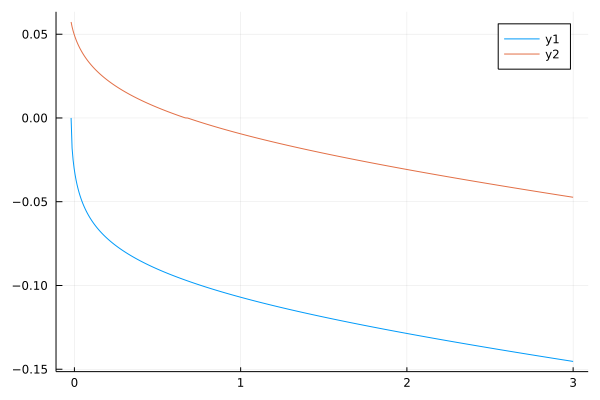

In [7]:
using Plots
# (na,nz) matrix
aa = [a a]
zz = ones(na,1)*z
adot = zz + r.*aa - c
plot(aa,adot)

- We solve for $\mathbf{v}$ by an iterative scheme.

- Let $\mathbf{v}^{n}$ be the value function from $n$th iteration
    - **Explicit method**:

    $$
      \frac{\mathbf{v}^{n+1}-\mathbf{v}^{n}}{\Delta} + \rho \mathbf{v}^{n} = \mathbf{u}^{n} + \mathbf{A}^{n}\mathbf{v}^{n}
    $$

    - **Implicit method**:

    $$
      \frac{\mathbf{v}^{n+1}-\mathbf{v}^{n}}{\Delta} + \rho \mathbf{v}^{n+1} = \mathbf{u}^{n} + \mathbf{A}^{n}\mathbf{v}^{n+1}
    $$

where $\Delta>0$ controls the speed of updating. 

- With the implicit method, we update $\mathbf{v}^{n}$ by

\begin{align*}
  & \mathbf{v}^{n+1} + \Delta\rho\mathbf{v}^{n+1} - \Delta\mathbf{A}^{n}\mathbf{v}^{n+1} = \Delta\mathbf{u}^{n} + \mathbf{v}^{n}, \\
  \Leftrightarrow & \mathbf{v}^{n+1} = (\mathbf{I} + \Delta\rho\mathbf{I} - \Delta\mathbf{A}^{n})^{-1}(\Delta\mathbf{u}^{n} + \mathbf{v}^{n}) \\
\end{align*}


# Stationary distribution

- To find an equilibrium price, we need to solve a stationary distribution

- Recall the Huggett (1993) with equilibrium conditions

$$
  \rho v(a,z) = \max_{c} u(c) + v_{a}(a,z)s(a,z) + \lambda \big(v(a,z')-v(a,z)\big) \\
  s(a,z) = r a + z -c, \quad a \geq \underline{a} \\
  0 = \sum_{z} \int_{\underline{a}}^{\infty} a g(a,z) da \\
  0 = -\frac{d}{da}\big[g(a,z)s(a,z)\big] + \lambda \big(g(a,z') - g(a,z)\big)
$$

<!-- (why $\frac{d}{da}$?) -->

$$
  \frac{\partial g(a,z)}{\partial t} = -\frac{d}{da}\big[g(a,z)s(a,z)\big] + \lambda \big(g(a,z') - g(a,z)\big)
$$

is Kolmogorov forward equation, and stationarity implies

$$
  \frac{\partial g(a,z)}{\partial t} = 0
$$

## Deriving KFE

$G$ is a cdf, $G(a,z_{i},t) = Pr(a_{t} \leq a, z_{t}=z_{j})$ for $j=1,2$.

Over a time period $dt$, $G$ evolves as 

\begin{align*}
  Pr(a_{t+dt} \leq \color{blue}{a}, z_{t+dt}=\color{magenta}{z_{j}}) &= \color{magenta}{\lambda_{-j}dt} Pr(a_{t} \leq \color{blue}{a-s(a,z_{-j})dt}, z_{t}=\color{magenta}{z_{-j}}) \\
  & + \color{magenta}{(1-\lambda_{j}dt)}Pr(a_{t} \leq \color{blue}{a-s(a,z_{j})dt}, z_{t}=\color{magenta}{z_{j}})
\end{align*}


- Saving: $a_{t+dt} = a_{t} + s(a_{t},z_{j})dt$
  - If one has $\color{blue}{a-s(a,z_{j})dt}$ at $t$, will have $\color{blue}{a}$ at $t+dt$


- Income: $z_{-j}$ switches to $z_{j}$ with an intensity $\lambda_{-j}dt$
  - $\color{magenta}{\lambda_{-j}dt}$: those who with $\color{magenta}{z_{-j}}$ at $t$ and get shocks over $dt$ to flow into $\color{magenta}{z_{j}}$
  - $\color{magenta}{1-\lambda_{j}dt}$: those who with $\color{magenta}{z_{j}}$ at $t$ and get no shocks over $dt$

- Then

\begin{align*}
  G(a,z,t+dt) &= Pr(a_{t+dt} \leq a, z_{t+dt}=z_{j}) \\
  &= (1-\lambda_{j}dt)Pr(a_{t} \leq a-s_{j}dt, z_{t}=z_{j}) + \lambda_{-j}dt Pr(a_{t} \leq a-s_{-j}dt, z_{t}=z_{-j}) \\
  &= (1-\lambda_{j}dt)G(a-s_{j}dt,z_{j},t) + \lambda_{-j}dt G(a-s_{-j}dt,z_{-j},t) \\
  &= G(a-s_{j}dt,z_{j},t) - \lambda_{j}dt G(a-s_{j}dt,z_{j},t) + \lambda_{-j}dt G(a-s_{-j}dt,z_{-j},t)
\end{align*}

where $s_{j}=s(a,z_{j})$

- Substract $G(a,z_{j},t)$ from both sides and devide by $dt$

$$
  \frac{G(a,z,t+dt)-G(a,z_{j},t)}{dt} = \frac{G(a-s_{j}dt,z_{j},t)-G(a,z_{j},t)}{dt} - \lambda_{j}G(a-s_{j}dt,z_{j},t) + \lambda_{-j}G(a-s_{-j}dt,z_{-j},t)
$$

- Take the limit as $dt \rightarrow 0$

$$
  \partial_{t}G(a,z_{j},t) = \partial_{a}G(a,z_{j},t)(-s_{j}) - \lambda_{j}G(a,z_{j},t) + \lambda_{-j}G(a,z_{-j},t)
$$

- Take the derivative wrt $a$

$$
  \partial_{t}g(a,z_{j},t) = \partial_{a}[g(a,z_{j},t)(-s_{j})] - \lambda_{j}g(a,z_{j},t) + \lambda_{-j}g(a,z_{-j},t)
$$

This is a Kolmogorov forward equation and $g(a,z_{j},t)=\partial_{a}G(a,z_{j},t)$ is a density function

## Solving KFE

- To solve the KFE, approximate $\frac{d}{da}[g(a,z)s(a,z)]$ with numerical derivatives by applying the upwind scheme.

$$
  0 = -\frac{d}{da}[g(a,z)s(a,z)] + \lambda \big(g(a,z') - g(a,z)\big)
$$

- The most convenient/correct approximation of $\frac{d}{da}[g(a,z)s(a,z)]$ is (Achdou et al., 2020)

$$
  \frac{s_{i,j}^{(F)}\mathbb{1}_{s_{i,j}^{(F)}>0}g_{i,j} - s_{i-1,j}^{(F)}\mathbb{1}_{s_{i-1,j}^{(F)}>0}g_{i-1,j}}{\Delta a} + \frac{s_{i+1,j}^{(B)}\mathbb{1}_{s_{i+1,j}^{(B)}>0}g_{i+1,j} - s_{i,j}^{(B)}\mathbb{1}_{s_{i,j}^{(B)}<0}g_{i,j}}{\Delta a}
$$

where $g_{i,j}=g(a_{i},z_{j})$


By substituting them, we have

\begin{align*}
  0 &= -\frac{s_{i,j}^{(F)}\mathbb{1}_{s_{i,j}^{(F)}>0}g_{i,j} - s_{i-1,j}^{(F)}\mathbb{1}_{s_{i-1,j}^{(F)}>0}g_{i-1,j}}{\Delta a} - \frac{s_{i+1,j}^{(B)}\mathbb{1}_{s_{i+1,j}^{(B)}>0}g_{i+1,j} - s_{i,j}^{(B)}\mathbb{1}_{s_{i,j}^{(B)}<0}g_{i,j}}{\Delta a} + \lambda_{-j} g_{i,-j} - \lambda_{j} g_{i,j}, \\
  &= \alpha_{i+1,j} g_{i+1,j} + \beta_{i,j} g_{i,j} + \xi_{i-1,j} g_{i-1,j} + \lambda_{-j} g_{i,-j}
\end{align*}

where

$$
  \alpha_{i+1,j} = \frac{-s_{i+1,j}^{(B)} \mathbb{1}_{s_{i+1,j}^{(B)}<0}}{\Delta a}, \quad \beta_{i,j} = \frac{-s_{i,j}^{(F)} \mathbb{1}_{s_{i,j}^{(F)}>0} + s_{i,j}^{(B)} \mathbb{1}_{s_{i,j}^{(B)}<0}}{\Delta a} - \lambda_{j}, \quad \xi_{i-1,j} = \frac{s_{i-1,j}^{(F)} \mathbb{1}_{s_{i-1,j}^{(F)}>0}}{\Delta a}
$$

It can be stacked into a matrix form: For example, $n_k=4$ and $n_z$ = 2

$$
    \left[
    \begin{array}{c}
    0\\
    0\\
    0\\
    0\\
    0\\
    0\\
    0\\
    0
    \end{array} \right] = 
    \left[
    \begin{array}{cccccccc}
    \beta_{1,1} & \alpha_{2,1} & 0 & 0 & \lambda_{2} & 0 & 0 & 0\\
    \xi_{1,1} & \beta_{2,1} & \alpha_{3,1} & 0 & 0 & \lambda_{2} & 0 & 0 \\
    0 & \xi_{2,1} & \beta_{3,1} & \alpha_{4,1} & 0 & 0 & \lambda_{2} & 0 \\
    0 & 0 & \xi_{3,1} & \beta_{4,1} & 0 & 0 & 0 & \lambda_{2} \\
    \lambda_{1} & 0 & 0 & 0 & \beta_{1,2} & \alpha_{2,2} & 0 & 0 \\
    0 & \lambda_{1} & 0 & 0 & \xi_{1,2} & \beta_{2,2} & \alpha_{3,2} & 0 \\
    0 & 0 & \lambda_{1} & 0 & 0 & \xi_{2,2} & \beta_{3,2} & \alpha_{4,2} \\
    0 & 0 & 0 & \lambda_{1} & 0 & 0 & \xi_{3,2} & \beta_{4,2}
    \end{array}
    \right]
    \left[
    \begin{array}{c}
    g_{1,1}\\
    g_{2,1}\\
    g_{3,1}\\
    g_{4,1}\\
    g_{1,2}\\
    g_{2,2}\\
    g_{3,2}\\
    g_{4,2}
    \end{array} \right]
$$

Or

$$
  \mathbf{0} = \mathbf{B}\mathbf{g}
$$

This is prefered because $\mathbf{B}=\mathbf{A}^{T}$ is obtained from the HJB equation

- If we solve the above equation, $g_{i,j}=0$ is a solution.

- But we have an implicit constraint

$$
  \sum_{z} \int_{\underline{a}}^{\infty} g(a,z) da = 1
$$

### Adjusting $\mathbf{B}$

$$
    \left[
    \begin{array}{c}
    \color{magenta}{0.1}\\
    0\\
    0\\
    0\\
    0\\
    0\\
    0\\
    0
    \end{array} \right] = 
    \left[
    \begin{array}{cccccccc}
    \color{magenta}{1} & 0 & 0 & 0 & \color{magenta}{0} & 0 & 0 & 0\\
    \xi_{1,1} & \beta_{2,1} & \alpha_{3,1} & 0 & 0 & \lambda_{2} & 0 & 0 \\
    0 & \xi_{2,1} & \beta_{3,1} & \alpha_{4,1} & 0 & 0 & \lambda_{2} & 0 \\
    0 & 0 & \xi_{3,1} & \beta_{4,1} & 0 & 0 & 0 & \lambda_{2} \\
    \lambda_{1} & 0 & 0 & 0 & \beta_{1,2} & \alpha_{2,2} & 0 & 0 \\
    0 & \lambda_{1} & 0 & 0 & \xi_{1,2} & \beta_{2,2} & \alpha_{3,2} & 0 \\
    0 & 0 & \lambda_{1} & 0 & 0 & \xi_{2,2} & \beta_{3,2} & \alpha_{4,2} \\
    0 & 0 & 0 & \lambda_{1} & 0 & 0 & \xi_{3,2} & \beta_{4,2}
    \end{array}
    \right]
    \left[
    \begin{array}{c}
    \tilde{g}_{1,1}\\
    \tilde{g}_{2,1}\\
    \tilde{g}_{3,1}\\
    \tilde{g}_{4,1}\\
    \tilde{g}_{1,2}\\
    \tilde{g}_{2,2}\\
    \tilde{g}_{3,2}\\
    \tilde{g}_{4,2}
    \end{array} \right]
$$

Or $\tilde{\mathbf{g}}_{0} = \tilde{\mathbf{B}}\tilde{\mathbf{g}}$

- We fix $g_{1,1}=0.1$ (or any positive number) and find the rest of $g_{i,j}$ values: $\tilde{\mathbf{g}} = \tilde{\mathbf{B}}^{-1}\tilde{\mathbf{g}}_{0}$
  - Note that the adjusted $\tilde{\mathbf{B}}$ is non-singular, whereas $\mathbf{B}$ is singular

- Then adjust the level of $g_{i,j}$'s to make the total mass equal to 1: $g_{i,j} = \frac{\tilde{g}_{i,j}}{\sum_{i,j}\tilde{g}_{i,j}}$

In [8]:
function fokker_planck(AT)

    # fokker-planck equation
    # AT = A'
    na = Int(size(AT,1)/2)
    
    b = zeros(2*na,1)

    # need to fix one value, otherwise matrix is singular
    i_fix = 1
    b[i_fix] = .1
    row = [zeros(1,i_fix-1) 1 zeros(1,2*na-i_fix)]
    AT[i_fix,:] = row

    # Solve linear system
    gg = AT\b
    g_sum = gg'*ones(2*na,1)*da
    gg = gg./g_sum

    g = [gg[1:na] gg[na+1:2*na]]
    

    return g
    
end

fokker_planck (generic function with 1 method)

  1.331619 seconds (3.02 M allocations: 173.557 MiB, 4.75% gc time, 99.85% compilation time)


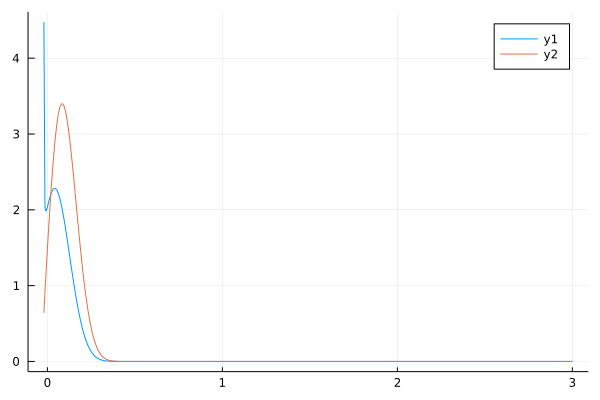

In [9]:
@time g = fokker_planck(AT);
plot(aa,g)

- Achdou et al. (2020) page 29

The deep underlying reason for this choise of discretization is that the KF equation actually *is* the "transpose" problem of the HJB equation. More precisely, the differential operator in the KF equation is the adjoint of the oprator in the HJB equation, the "infinitesimal generator." Our transpose discretization of the KF equation is not only well-founded mathmatically; it is also extremely convenient: having solved the HJB equation, the solution of the Kolmogolov Forward equation is essentially "for free."